In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [8]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "coverage_rate_model_multi_parameter.nc"
variable_list = ['b_p']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "coverage_rate_parameters_multi"



transformations = {
    #'a_m': log_to_exp,

}

table_location = f"tables/{file_name}.csv"
image_location = f"images/{file_name}.pdf"


### Generate Summary object

In [9]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [10]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'AlgorithmIterations')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_p[Elite|TestChangeProb],-0.191,0.333,-0.727,0.214,0.003,0.002,14773.0,14773.0,1.0
b_p[StatemInsertProb|TestDeleteProb],-0.169,0.318,-0.686,0.241,0.003,0.002,15410.0,14110.0,1.0
b_p[Elite|TestDeleteProb],-0.125,0.298,-0.586,0.299,0.002,0.002,17082.0,14907.0,1.0
b_p[ChromLen|Pop],-0.109,0.289,-0.594,0.286,0.002,0.002,18678.0,14412.0,1.0
b_p[Pop|TestDeleteProb],-0.096,0.279,-0.564,0.300,0.002,0.002,21398.0,16190.0,1.0
b_p[TestInsertProb|TourSize],-0.086,0.281,-0.522,0.348,0.002,0.002,20944.0,13836.0,1.0
b_p[ChromLen|Crossover],-0.086,0.284,-0.542,0.334,0.002,0.002,20564.0,14126.0,1.0
b_p[ChromLen|TestDeleteProb],-0.077,0.274,-0.524,0.320,0.002,0.002,21875.0,16423.0,1.0
b_p[ChromLen|TourSize],-0.076,0.274,-0.529,0.327,0.002,0.002,23216.0,15756.0,1.0
b_p[RandPert|StatemInsertProb],-0.069,0.273,-0.508,0.336,0.002,0.002,25235.0,15216.0,1.0


### Save summary table as CSV

In [11]:
summary.to_csv(table_location, index=True)

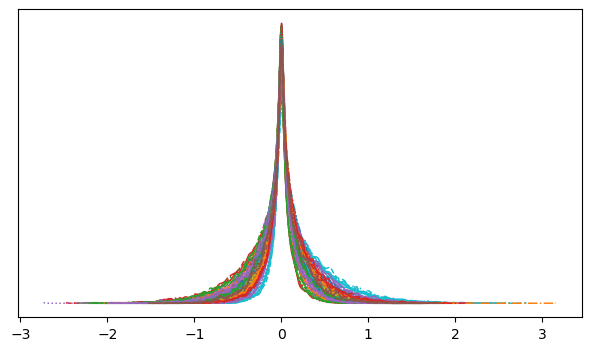

In [12]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()